In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(10,20)

# import dataset

In [2]:
df =pd.read_csv('Documents//datasets//bengaluru_house_data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# number of rows and columns

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# grouping by aggregate -counting the frequency

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
pavitra paradise                    1
Bharath Housing Society Layout      1
Doddabele                           1
Handenahalli                        1
Gangondanahalli                     1
Name: location, Length: 1305, dtype: int64

In [8]:
df.location.value_counts(ascending=True)

Gangondanahalli                     1
Handenahalli                        1
Doddabele                           1
Bharath Housing Society Layout      1
pavitra paradise                    1
                                 ... 
Thanisandra                       234
Kanakpura Road                    273
Electronic City                   302
Sarjapur  Road                    399
Whitefield                        540
Name: location, Length: 1305, dtype: int64

# droping rows not important

In [9]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# data cleaning

In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


# dropping rows which have null values

In [13]:
df2 =df1.dropna()

In [14]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df2.shape

(13246, 5)

# getting unique value of size

In [16]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# create a column ,take the first value of size and make it an input to the new column

In [17]:
df2['bhk'] = df2['size'].apply(lambda x :int(x.split(' ')[0])) # split '2 BHk' and take the first value

<ipython-input-17-57553181c994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x :int(x.split(' ')[0])) # split '2 BHk' and take the first value


In [18]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

# to get house having some specified number of rooms

In [20]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


# getting unique square feet

In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# define a function to check float value in total square feet

In [22]:
def is_float(x):
    try:
        float(x)
    except: False
        
    return True    

# checking total square feet values using is_float function

In [23]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


In [24]:
df2[df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


# function to check if square_feet value has dash -

In [25]:
def convert_sqrt_to_num(x):# x -value passed
    tokens =x.split('-') # split - anywhere seen
    if len(tokens) == 2: # if the lenght is = 2
        return (float(tokens[0]) + float(tokens[1])) /2  # add 1st and 2nd then divide by 2
    try:
        return float(x)  # else return the value given
    except:
        return None

# call convert_sqrt_to_num() function

In [26]:
convert_sqrt_to_num('2155')


2155.0

In [27]:
convert_sqrt_to_num('4678')


4678.0

In [28]:
convert_sqrt_to_num('2388-2389')

2388.5

In [29]:
df3 = df2.copy()

# apply convert_sqrt_to_num() function()

In [30]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqrt_to_num)
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [31]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [32]:
(2100 +2850)/2

2475.0

# future engineering 

In [33]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [34]:
df4 = df3.copy()

In [35]:
type(df4.total_sqft)

pandas.core.series.Series

In [36]:
type(df.price)

pandas.core.series.Series

# divide  price by total_sqft

In [37]:
df4['price_per_sqft'] = df4['price'] *100000/ df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [39]:
print('number of row:' , len(df4))
print('rows of location:' ,len(df4.location.unique()))

number of row: 13246
rows of location: 1304


In [40]:
df4.location =df4.location.apply(lambda x: x.strip())


# grouping by location and count

In [41]:
location_stats=df4.groupby('location')['location'].agg('count')

In [42]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [43]:
location_stats.value_counts(ascending=True)

46      1
84      1
81      1
68      1
67      1
     ... 
5      56
4      77
3     129
2     174
1     472
Name: location, Length: 90, dtype: int64

In [44]:
df4.location.value_counts()

Whitefield          535
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      266
Thanisandra         236
                   ... 
Chikbasavanapura      1
Uvce Layout           1
1Hoysalanagar         1
D Souza Layout        1
Gangondanahalli       1
Name: location, Length: 1293, dtype: int64

In [45]:
len(location_stats[location_stats <=10])

1052

# locations having less than 10 data points should be tagged as "other" location. 




In [46]:
location_less_than_10 = location_stats[location_stats <=10]

In [47]:
location_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [48]:
len(df4.location.unique())

1293

# locations having less than 10 data points should be tagged as "other" location. 

In [49]:
df4.location = df4.location.apply(lambda x : 'other' if x in location_less_than_10 else x)

In [50]:
len(df4.location.unique())

242

In [51]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# fetching houses with less than 300 square feet

In [52]:
df4[df4.total_sqft / df4.bhk < 300].head() # 1020 /6 ,600 /8 ,1497/6,1350/8,500/3 all are less than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


# number of rows and columns

In [53]:
df4.shape

(13246, 7)

# fetching houses that are not less than 3oo square feet

In [54]:
df5 =df4[~(df4.total_sqft / df4.bhk < 300)]

In [55]:
df5.shape

(12502, 7)

In [56]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# function to filter data distribution based on mean,std
# min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
# Remove outliers per location using mean and one standard deviation

In [57]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft <(m+st))]
        df_out = pd.concat([df_out ,reduced_df ],ignore_index =True)
        
    return df_out

# number of rows and columns after outliers function

In [58]:
df6 = remove_outliers(df5)
df6.shape

(10241, 7)

# function plot scatter plot for 2 bedrooms,and 3 bedrooms
#  check the location how   2 BHK and 3 BHK property prices look like

In [59]:
def plot_scatter_chart(df,location):
    bhk2 =df[(df.location == location) & (df.bhk ==2)]# location where you have 2 bedrooms
    bhk3 =df[(df.location == location) & (df.bhk==3)] # location where you have 3 bedrooms
    matplotlib.rcParams['figure.figsize'] =(15 ,10)
    plt.scatter(bhk2.total_sqft ,bhk2.price ,color ='blue' ,label='2 BHK' ,s=50) # total_sqft $ price
    plt.scatter(bhk3.total_sqft ,bhk3.price ,marker='+' ,color ='green' ,label='3 BHK' ,s=50) # total_sqft $ price
   
    plt.xlabel('Total Squre Feet Area')
    plt.ylabel('Price per Squre Feet')
    plt.title(location)
    plt.legend()

# plotscatter plot choosing a location from data availabe -df6

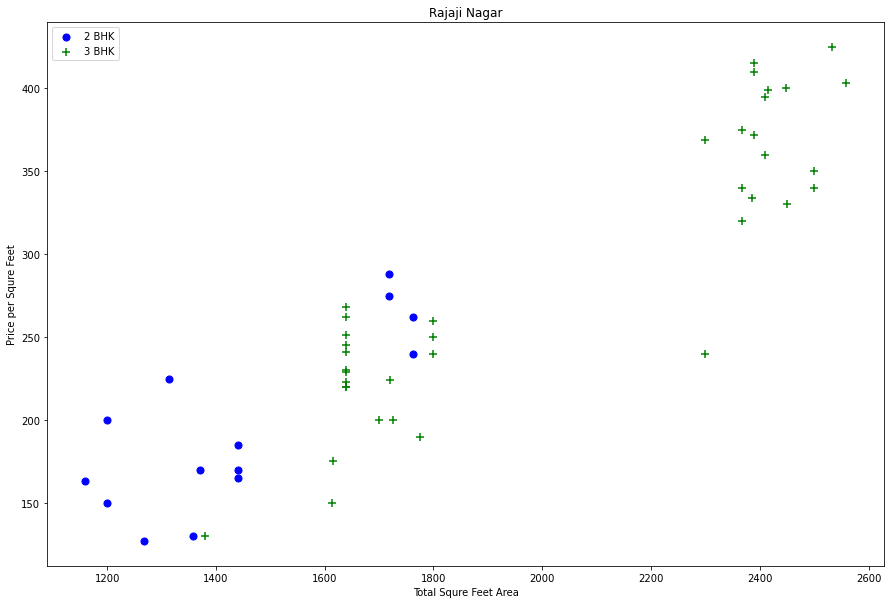

In [60]:
plot_scatter_chart(df6,"Rajaji Nagar") # df6:data,location :Rajaji Nagar 

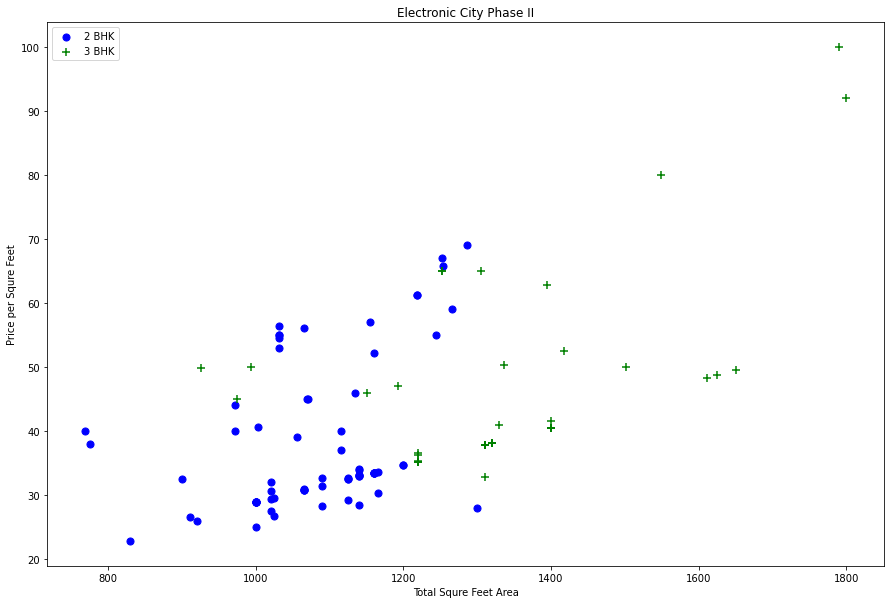

In [61]:
plot_scatter_chart(df6,"Electronic City Phase II") # df6:data,location :Rajaji Nagar

# data cleaning
# Remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [62]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7329, 7)

In [63]:
df8 =remove_bhk_outliers(df6)
df8.shape

(7329, 7)

# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

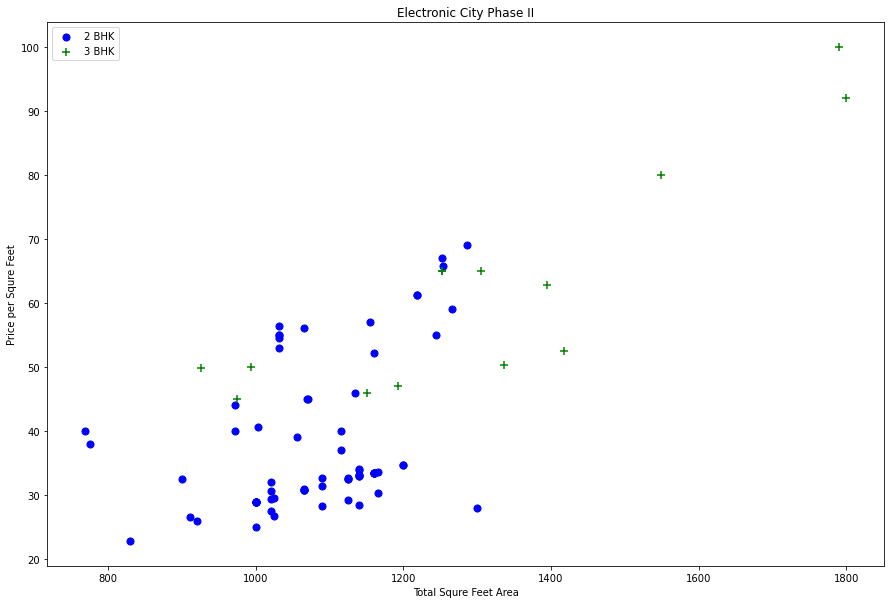

In [64]:
plot_scatter_chart(df7,"Electronic City Phase II") # df6:data,location :Rajaji Nagar

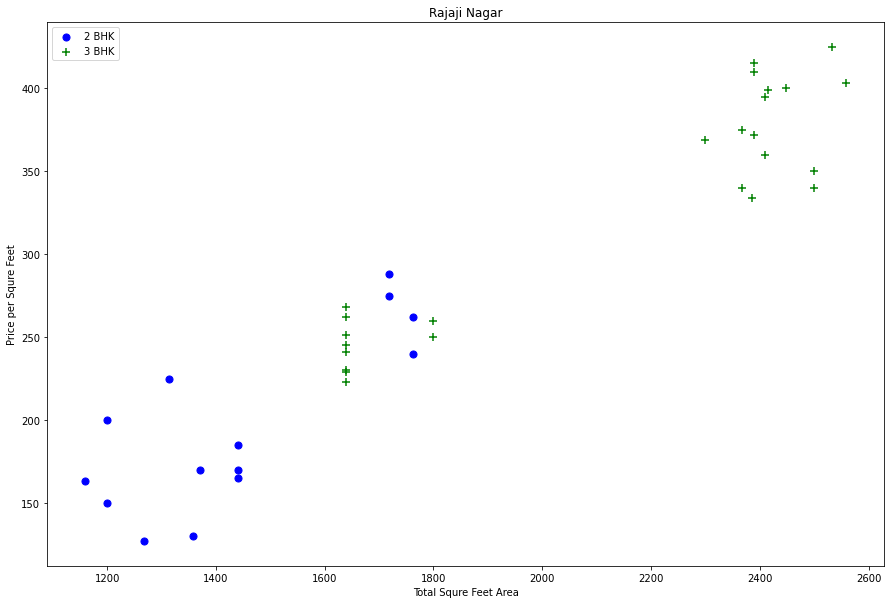

In [65]:
plot_scatter_chart(df7,"Rajaji Nagar")

# plot the graph using matplotlib

Text(0, 0.5, 'Count')

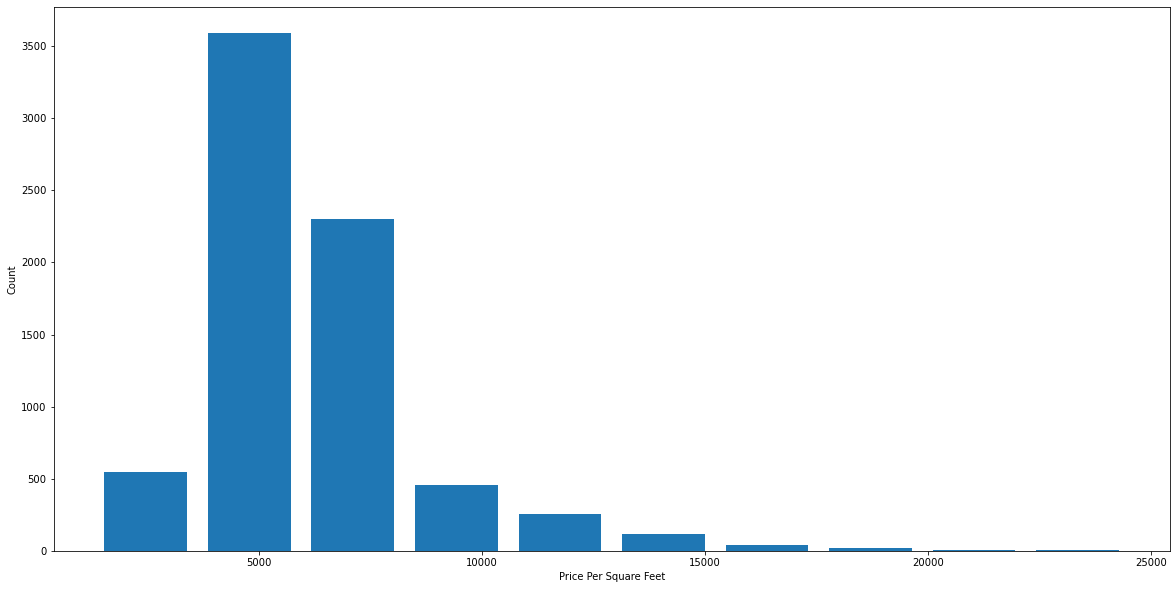

In [66]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [67]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [68]:
df7[df['bath']>10]

<ipython-input-68-b403073a1035>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df7[df['bath']>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
938,Bannerghatta Road,2 BHK,1200.0,2.0,78.00,2,6500.000000
1078,Begur Road,2 BHK,1200.0,2.0,44.00,2,3666.666667
1718,Dasanapura,3 BHK,1286.0,2.0,68.00,3,5287.713841
1768,Devarachikkanahalli,2 BHK,947.0,2.0,43.00,2,4540.654699
1953,Electronic City,3 BHK,1563.0,3.0,91.84,3,5875.879718
1979,Electronic City,2 BHK,1128.0,2.0,65.50,2,5806.737589
3096,Hennur Road,3 BHK,2264.0,3.0,168.00,3,7420.494700
4684,Kudlu Gate,3 BHK,1535.0,3.0,85.00,3,5537.459283
6937,Uttarahalli,2 BHK,1025.0,2.0,35.88,2,3500.487805
8106,other,3 BHK,1976.0,3.0,184.00,3,9311.740891


In [69]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


# plot the graph using histogram

Text(0, 0.5, 'count')

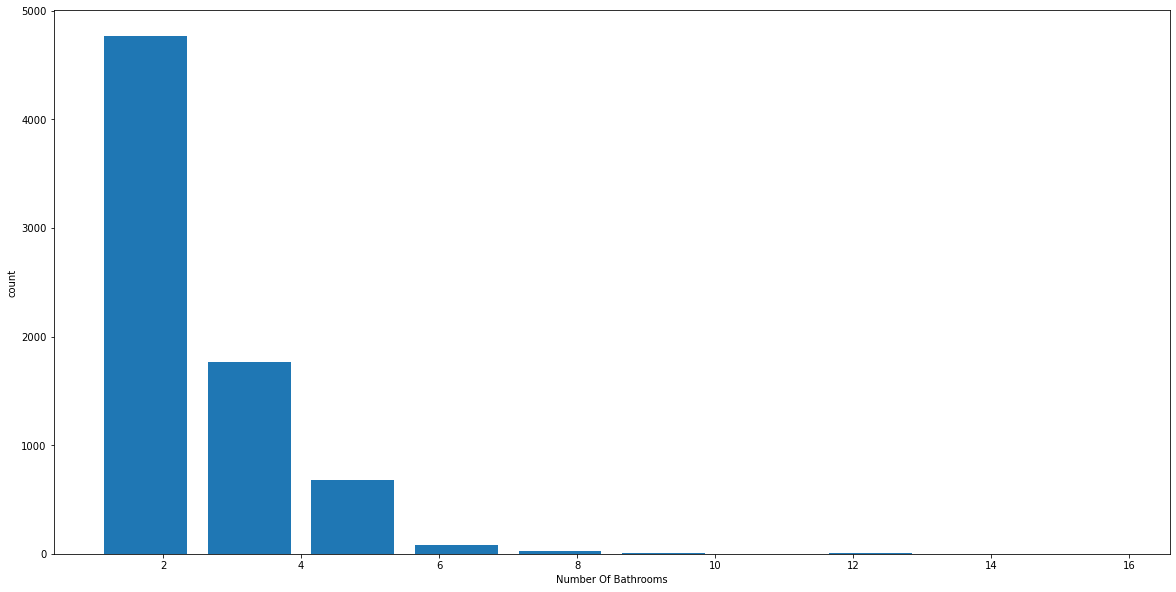

In [70]:
plt.hist(df7.bath ,rwidth =0.8) # rwidth -the width of the graph
plt.xlabel('Number Of Bathrooms')
plt.ylabel('count')

# It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [71]:
df7[df7.bath >df7.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


# applyig outliers to the data

In [72]:
df8 =df7[df7.bath < df7.bhk +2]
df8.shape

(7251, 7)

In [73]:
df9 =df8.drop(['size' ,'price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# using one hot encoding - dummies to convert string value to number -> location

In [74]:
pd.get_dummies(df9.location) # assign value to every location like 1,2,3 ...

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
dummy =pd.get_dummies(df9.location)

In [76]:
dummy.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df10 =pd.concat([df9,dummy.drop('other' ,axis='columns')],axis='columns') # drop other column

In [78]:
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df11 =df10.drop('location' ,axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df11.shape

(7251, 245)

In [130]:
X = df11.drop('price' ,axis='columns')
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
Y = df11.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# import train_test_split

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(X,Y ,test_size=0.2 ,random_state=10)

# import logistic model

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train ,y_train)


LinearRegression()

# assessing the score accuracy

In [135]:
lr.score(x_test,y_test)*100

84.5227769787428

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [109]:
cv = ShuffleSplit(n_splits=5 ,test_size=0.2 ,random_state=0)
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [137]:
cross_val_score(LinearRegression() ,X,Y ,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])


# 5 iterations score gotten  above 80% all the time. 
# few other algorithms for regression to see which is a better score using  GridSearchCV for this purpose



In [138]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [139]:
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [140]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.730062,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [142]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

# getting the index position of location -2nd phase judicial layout

In [143]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

# Test the model for few properties

In [146]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

# making prediction for price based on location ,sqft,how  many bedrooms ,bathroom 

In [149]:
predict_price('1st Phase JP Nagar',1000, 2, 2) * 1000 # location :1st phse jp nag ,sqft :1000 ,bedroom:2 ,bathroom:2

83499.04677167736

# price for 1st phase jp nagar having 1000 sqft 3bedroom,3bathroom

In [151]:
predict_price('1st Phase JP Nagar',1000, 3, 3) * 1000

86805.19395194287

In [152]:
predict_price('Indira Nagar',1000, 2, 3) * 1000

179505.27707582308

In [153]:
predict_price('Indira Nagar',1000, 3, 2) * 1000

186357.17978458296

# Export the tested model to a pickle file

In [155]:
import pickle
with open('Documents//datasets//banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)



# Export location and column information to a file that will be useful for future prediction application

In [156]:
import json
columns ={
    'data_columns' :[col.lower() for col in X.columns] 
}

In [158]:
with open("columns.json" ,"w") as f:
    f.write(json.dumps(columns))
     

In [159]:
pwd

'/Users/apple'